In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Load the Diabetes dataset (hint: convert it into Pandas DataFrame for better analysis)

In [22]:
# Load the Diabetes dataset
diabetes = load_diabetes(as_frame=True)

# Convert into Pandas DataFrame
df = diabetes.frame

### Display first few rows

In [23]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


## Visualize the data (i.e. histograms, heatmaps etc)

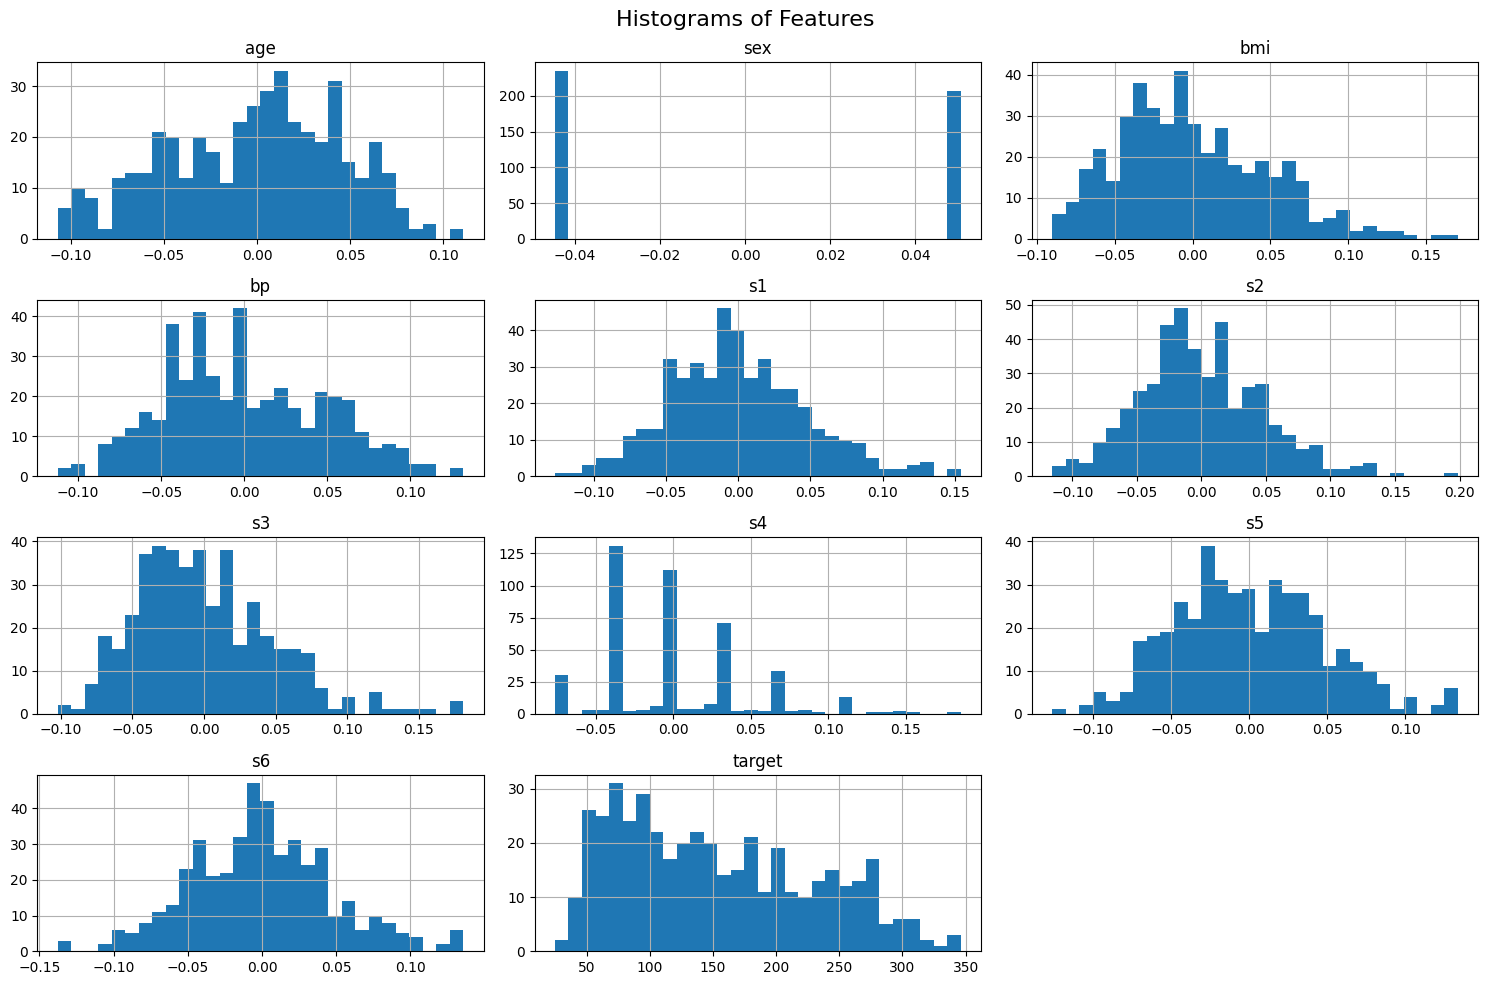

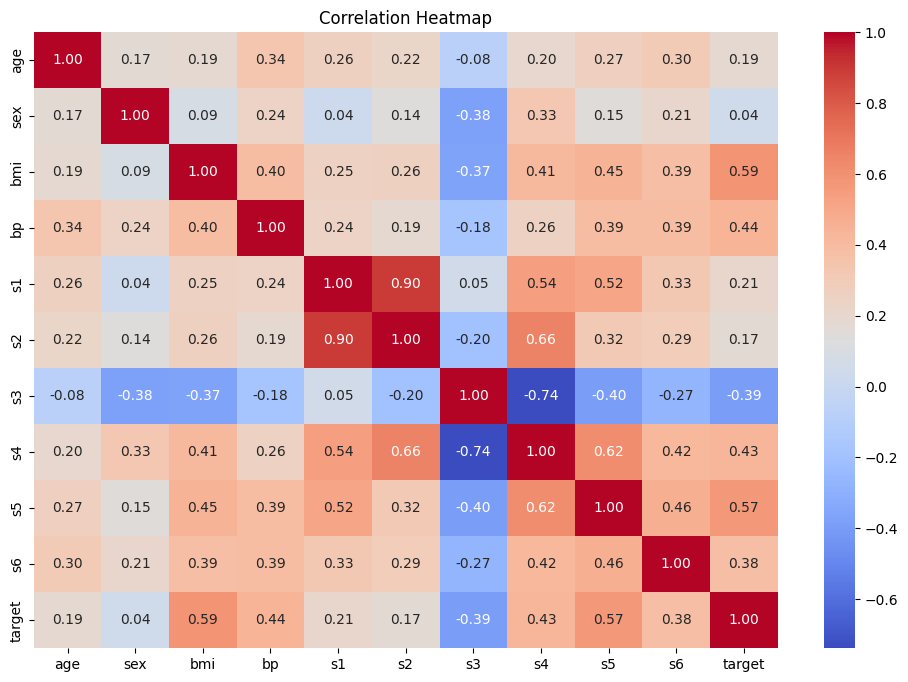

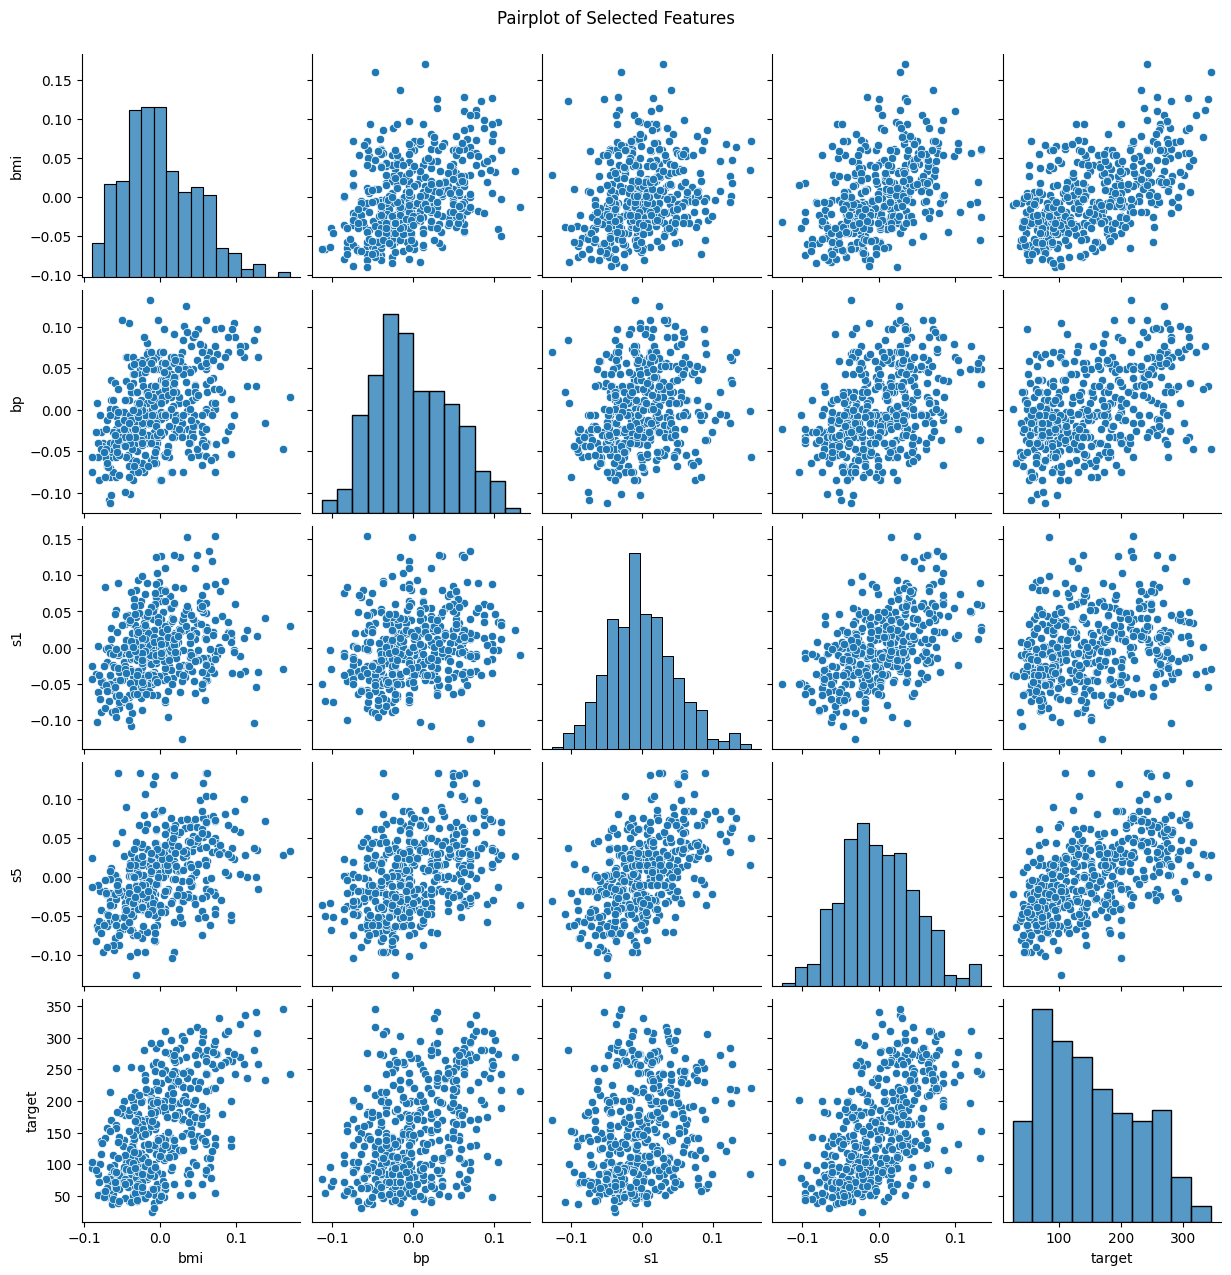

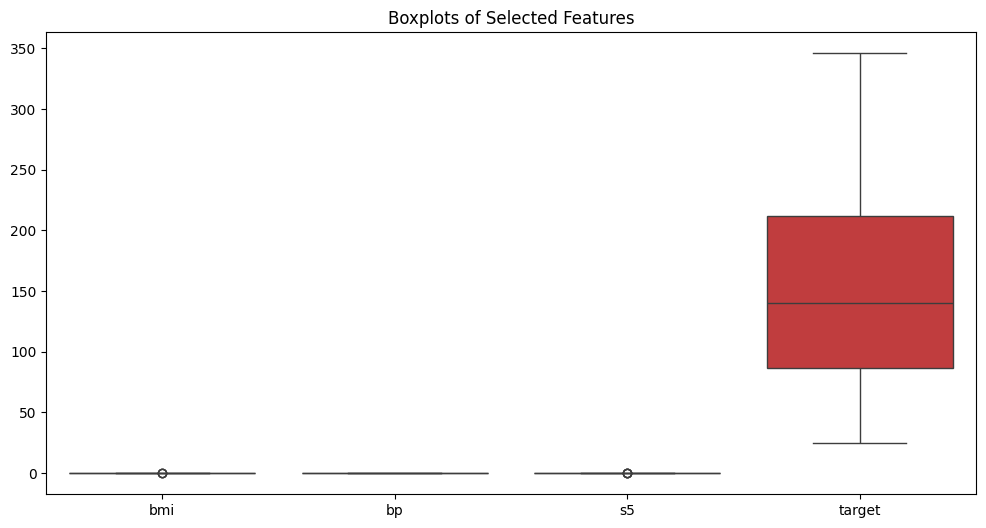

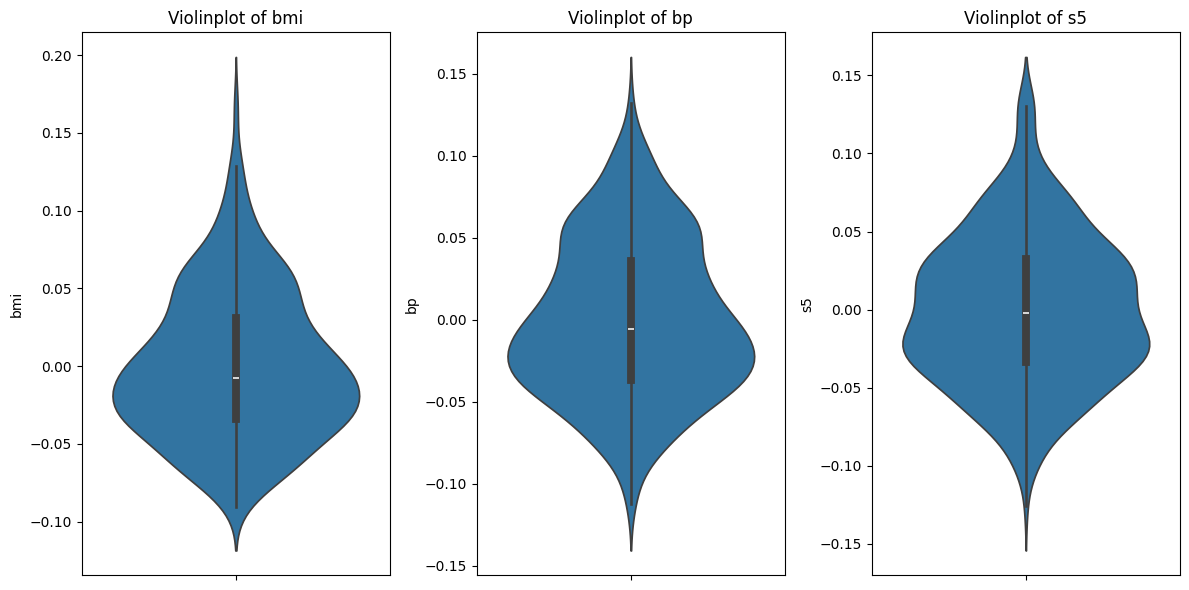

In [24]:
# Histogram
df.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Features', fontsize=16)
plt.tight_layout()
plt.show()

# Heatmap 
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Pairplot
sns.pairplot(df[['bmi', 'bp', 's1', 's5', 'target']])
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['bmi', 'bp', 's5', 'target']])
plt.title('Boxplots of Selected Features')
plt.show()

# Violinplots 
plt.figure(figsize=(12, 6))
selected_features = ['bmi', 'bp', 's5']

for i, feature in enumerate(selected_features, 1):
    plt.subplot(1, 3, i)
    sns.violinplot(y=df[feature])
    plt.title(f'Violinplot of {feature}')

plt.tight_layout()
plt.show()


## Standardize the features

In [25]:
# Διαχωρίζουμε χαρακτηριστικά και target
X = df.drop(columns='target')
y = df['target']

# Εφαρμογή StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Μετατροπή πίσω σε DataFrame για ευκολότερη χρήση
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.800500,1.065488,1.297088,0.459841,-0.929746,-0.732065,-0.912451,-0.054499,0.418531,-0.370989
1,-0.039567,-0.938537,-1.082180,-0.553505,-0.177624,-0.402886,1.564414,-0.830301,-1.436589,-1.938479
2,1.793307,1.065488,0.934533,-0.119214,-0.958674,-0.718897,-0.680245,-0.054499,0.060156,-0.545154
3,-1.872441,-0.938537,-0.243771,-0.770650,0.256292,0.525397,-0.757647,0.721302,0.476983,-0.196823
4,0.113172,-0.938537,-0.764944,0.459841,0.082726,0.327890,0.171178,-0.054499,-0.672502,-0.980568


### Visualize the standardized data

What do you observe?

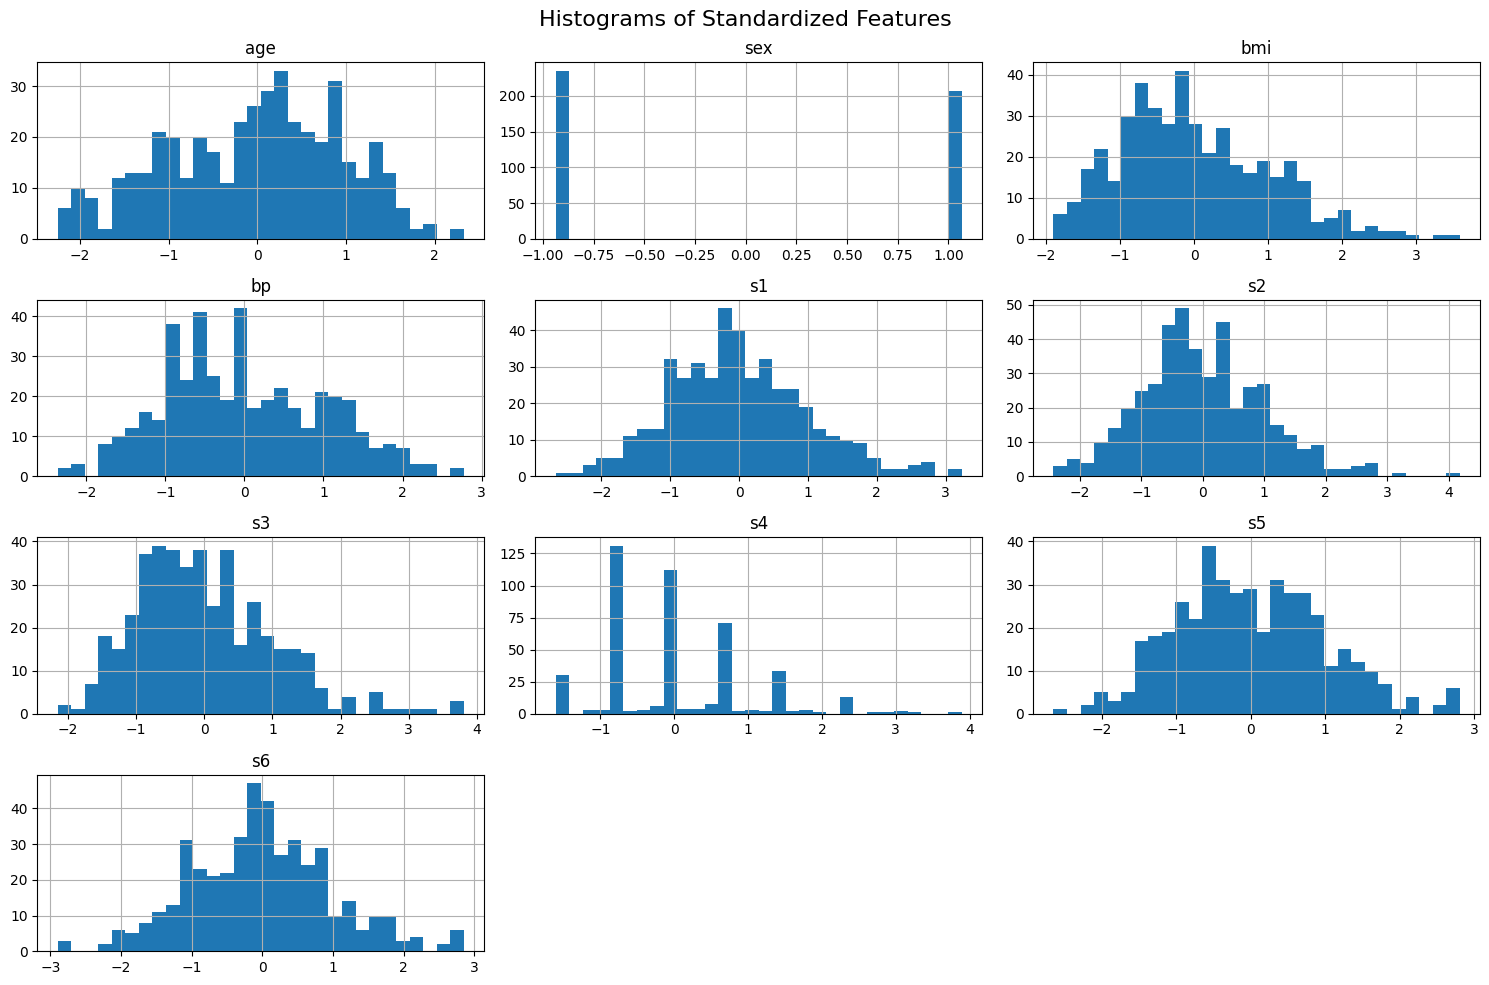

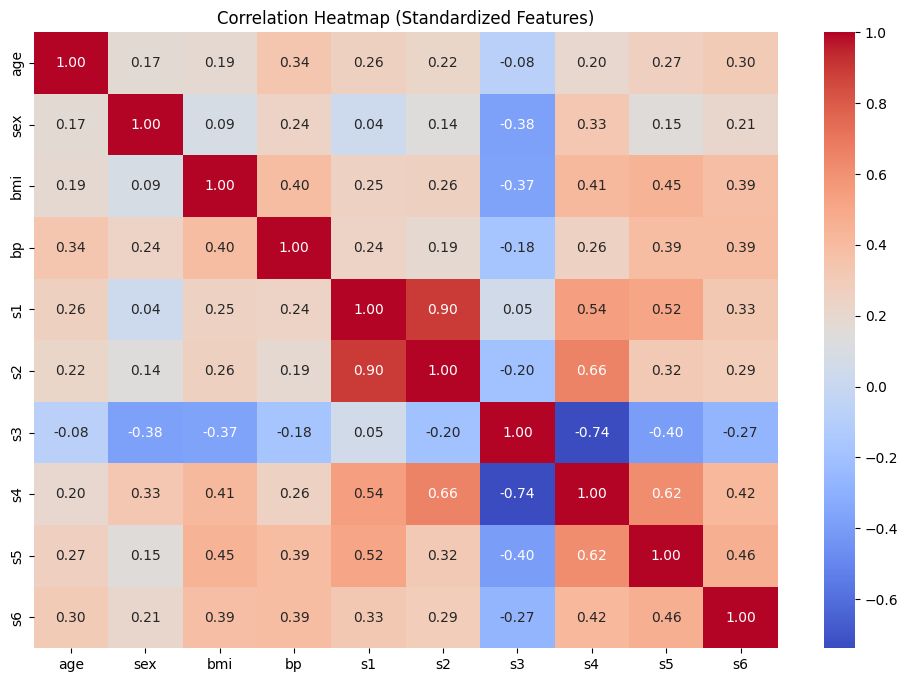

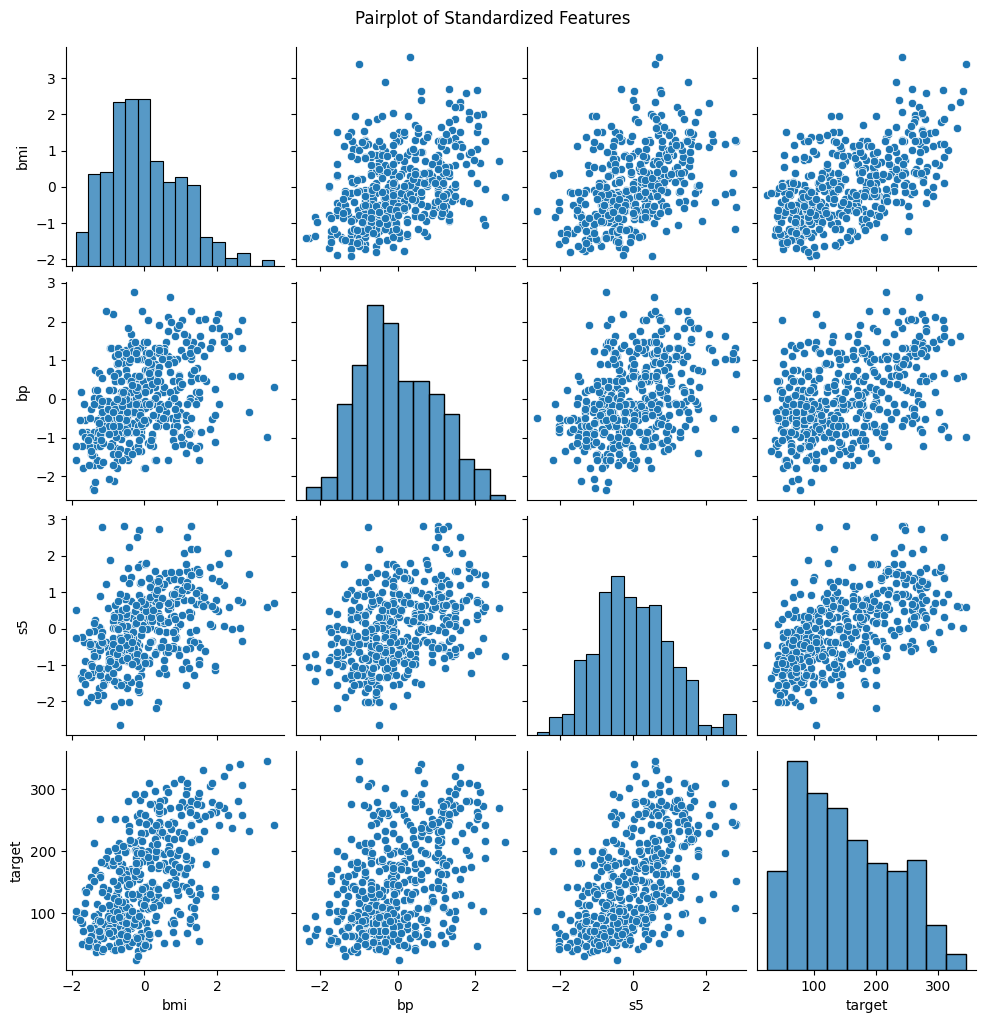

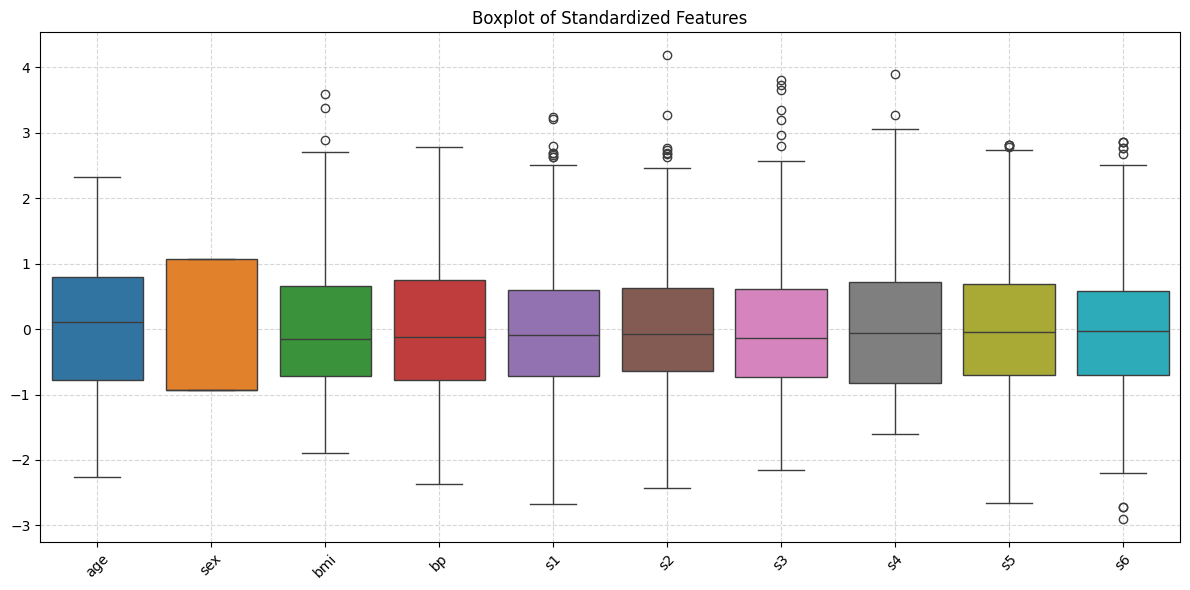

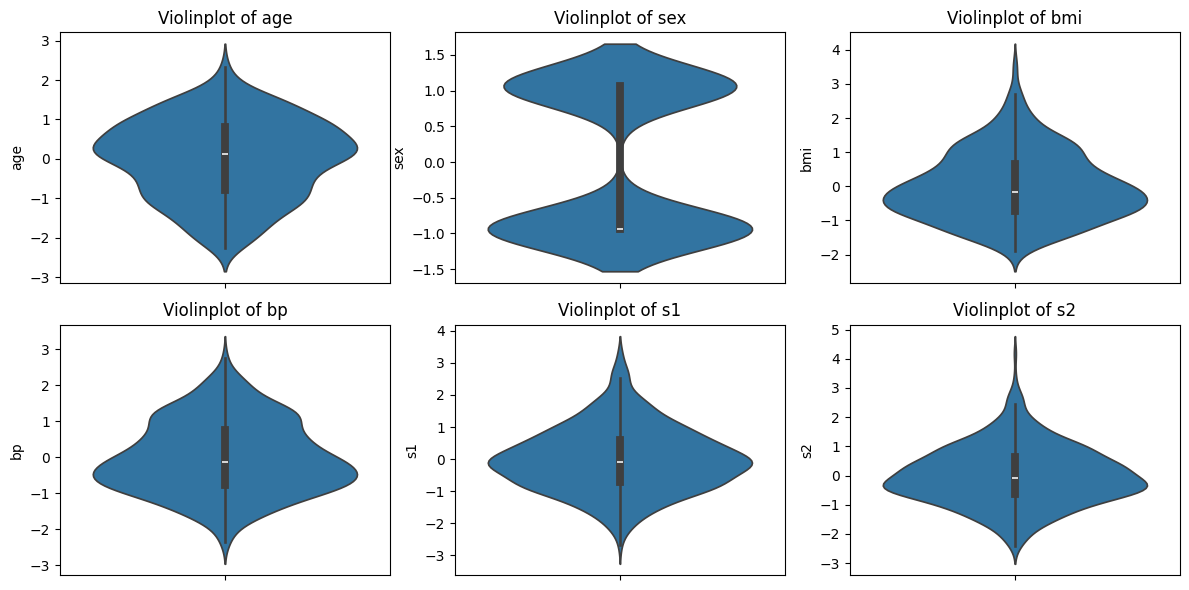

In [26]:
# 1. Histogram
X_scaled.hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Standardized Features', fontsize=16)
plt.tight_layout()
plt.show()

# 2. Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(X_scaled.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Standardized Features)')
plt.show()

#3. Pairplot
sns.pairplot(pd.concat([X_scaled[['bmi', 'bp', 's5']], y], axis=1))
plt.suptitle("Pairplot of Standardized Features", y=1.02)
plt.show()

# 4. Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=X_scaled)
plt.title('Boxplot of Standardized Features')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# 5. Violinplot
plt.figure(figsize=(12, 6))
for i, feature in enumerate(X_scaled.columns[:6], 1):  # δείχνουμε τα πρώτα 6 για καθαρότητα
    plt.subplot(2, 3, i)
    sns.violinplot(y=X_scaled[feature])
    plt.title(f'Violinplot of {feature}')
plt.tight_layout()
plt.show()


### Παρατηρήσεις

- Όπως αναμένεται από τη διαδικασία κανονικοποίησης (Standardization), όλα τα χαρακτηριστικά έχουν μέση τιμή κοντά στο 0 και παρόμοια διακύμανση.
- Παρατηρούνται outliers σε κάποια χαρακτηριστικά όπως τα `s1`, `s2`, και `s5`, που φαίνονται από τις μακριές "ουρές" στα boxplots.


## Apply PCA

In [27]:
# Apply PCA

# Ορίζουμε τον PCA με τόσες συνιστώσες όσες και τα χαρακτηριστικά
pca = PCA(n_components=X_scaled.shape[1])

# Εφαρμόζουμε PCA στα standardized data
X_pca = pca.fit_transform(X_scaled)

# Μετατρέπουμε το αποτέλεσμα σε DataFrame για ευκολία
X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])
X_pca_df.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.587199,-1.946832,0.589205,0.082816,0.256680,-1.011210,-0.179844,-0.757431,-0.181075,-0.048953
1,-2.831625,1.372082,0.027930,0.470008,0.143269,-1.013015,0.224398,0.188436,0.505128,0.043599
2,0.272129,-1.634901,0.739244,0.791492,1.163870,-1.112763,-0.462452,-0.843203,-0.025353,-0.054175
3,0.049281,0.382278,-2.013032,-1.373216,-0.255570,0.445288,0.482102,0.367871,-0.137857,-0.074558
4,-0.756421,0.811960,-0.057238,0.137495,0.133402,-0.814559,0.436536,1.059751,0.044284,-0.010914


## Plot the explained variance

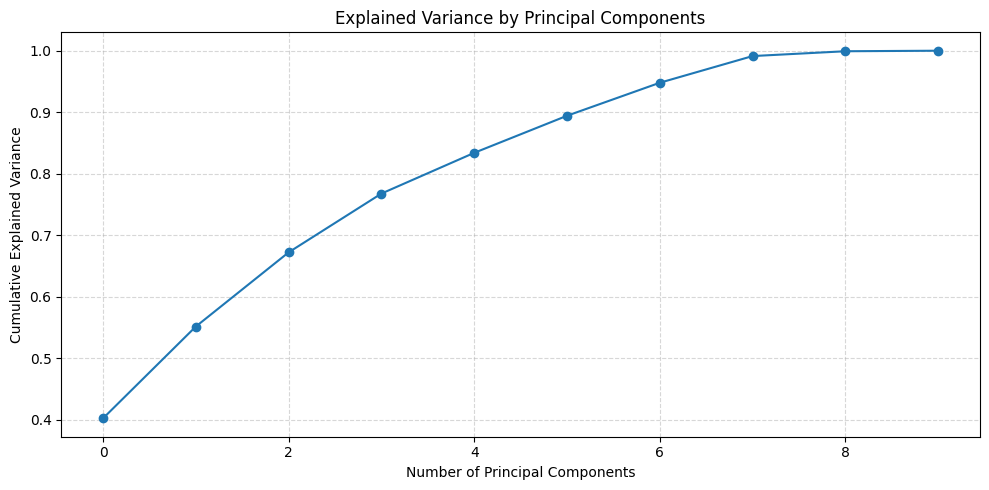

In [28]:
# Plot the explained variance

plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Choose the optimal number of components

Why did you select this number?

In [29]:
# Choose the optimal number of components

# Βρίσκουμε τον ελάχιστο αριθμό συνιστωσών που εξηγεί τουλάχιστον το 95% της διασποράς
cum_variance = np.cumsum(pca.explained_variance_ratio_)
optimal_components = np.argmax(cum_variance >= 0.95) + 1  # +1 γιατί τα indices ξεκινούν από 0

print(f"Optimal number of components to retain ≥95% variance: {optimal_components}")


Optimal number of components to retain ≥95% variance: 8


## Perform Regression using the original data

In [30]:
# Perform Regression using the original data

# Διαχωρισμός σε σύνολο εκπαίδευσης και δοκιμής
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Εκπαίδευση γραμμικού μοντέλου
model_original = LinearRegression()
model_original.fit(X_train, y_train)

# Πρόβλεψη και αξιολόγηση
y_pred_original = model_original.predict(X_test)
r2_original = r2_score(y_test, y_pred_original)

print(f"R² score using original standardized data: {r2_original:.4f}")


R² score using original standardized data: 0.4526


## Perform regression using the PCA-transformed data

In [31]:
# Perform regression using the PCA-transformed data

# Διαχωρισμός των PCA δεδομένων με βάση τον optimal αριθμό συνιστωσών
X_pca_optimal = X_pca_df.iloc[:, :optimal_components]

# Split σε train/test
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca_optimal, y, test_size=0.2, random_state=42)

# Εκπαίδευση μοντέλου
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train_pca)

# Πρόβλεψη και αξιολόγηση
y_pred_pca = model_pca.predict(X_test_pca)
r2_pca = r2_score(y_test_pca, y_pred_pca)

print(f"R² score using PCA-transformed data ({optimal_components} components): {r2_pca:.4f}")


R² score using PCA-transformed data (8 components): 0.4560


## Display the results

Model Performance Comparison:
• R² score using original standardized data      : 0.4526
• R² score using PCA-transformed data (8 PCs): 0.4560


C:\Users\User\AppData\Local\Temp\ipykernel_18796\3985825771.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=scores, palette='Set2')


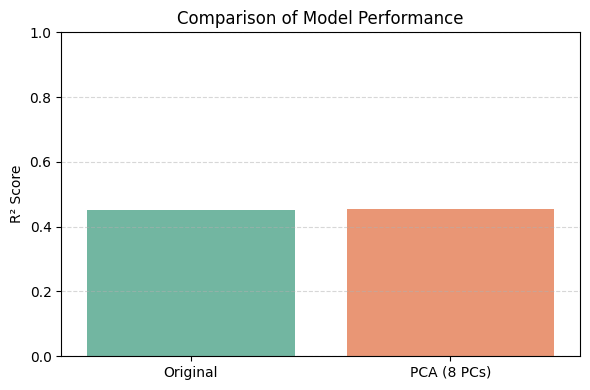

In [32]:
# Display the R² results for comparison

print("Model Performance Comparison:")
print(f"• R² score using original standardized data      : {r2_original:.4f}")
print(f"• R² score using PCA-transformed data ({optimal_components} PCs): {r2_pca:.4f}")


# Bar plot για σύγκριση R² scores

plt.figure(figsize=(6, 4))
scores = [r2_original, r2_pca]
labels = ['Original', f'PCA ({optimal_components} PCs)']

sns.barplot(x=labels, y=scores, palette='Set2')
plt.ylim(0, 1)
plt.ylabel('R² Score')
plt.title('Comparison of Model Performance')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


## Principal Component Interpretation

Analyze the PCA components to understand which original features contribute most to each principal component (hint: use *pca_optimal.components_* )

In [33]:
# Principal Component Interpretation

# Παίρνουμε τους συντελεστές (loadings) για τις κύριες συνιστώσες
components = pca.components_[:optimal_components]

# Δημιουργούμε DataFrame με τις τιμές και ετικέτες
loadings_df = pd.DataFrame(components, columns=X_scaled.columns, index=[f'PC{i+1}' for i in range(optimal_components)])

# Εμφάνιση των loadings
loadings_df.T  # Transpose για να βλέπουμε ανά χαρακτηριστικό


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
age,0.216431,0.044367,0.494668,0.414012,0.686876,-0.225815,-0.109530,-0.014937
sex,0.186967,-0.386547,-0.106864,0.679860,-0.373464,0.041705,-0.067622,-0.442933
bmi,0.303162,-0.156281,0.167527,-0.499825,-0.129333,-0.403151,-0.519874,-0.392922
bp,0.271738,-0.138266,0.513571,0.019662,-0.486874,-0.272783,0.320655,0.477360
s1,0.343255,0.573027,-0.068579,0.068396,-0.129180,0.005398,0.073644,-0.129411
s2,0.351861,0.455942,-0.269689,0.167774,-0.116722,-0.133262,-0.230535,0.191325
s3,-0.282437,0.506239,0.386032,0.076020,-0.245001,0.106354,-0.007548,-0.324635
s4,0.428834,-0.068181,-0.380680,-0.007921,0.143646,-0.033936,0.071244,0.180587
s5,0.378618,-0.026187,0.063630,-0.264427,0.151639,0.178731,0.647302,-0.449684
s6,0.322183,-0.084949,0.276842,-0.087085,-0.031423,0.805066,-0.357267,0.166608


### Visualize components weights (heatmap)

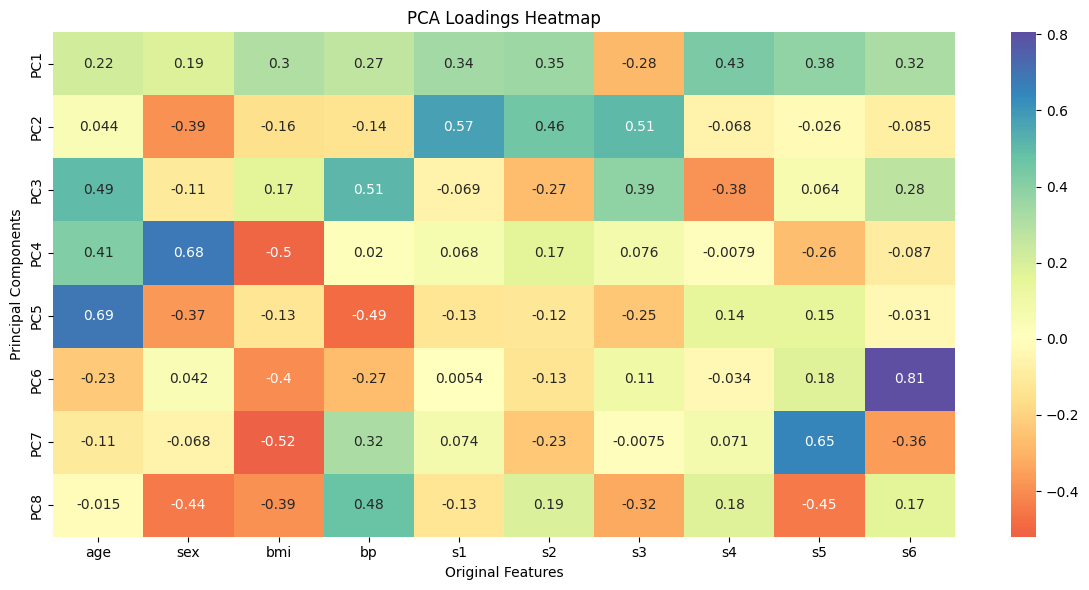

In [34]:
# Heatmap των PCA loadings

plt.figure(figsize=(12, 6))
sns.heatmap(loadings_df, annot=True, cmap='Spectral', center=0)
plt.title('PCA Loadings Heatmap')
plt.xlabel('Original Features')
plt.ylabel('Principal Components')
plt.tight_layout()
plt.show()



**Questions:**


*   How does PCA impact regression performance?
*   Compare the results: Does reducing dimensionality improve or worsen the prediction accuracy?
* Would you recommend using PCA before regression on this dataset? Why or why not?



**1.**  
PCA transforms the data into fewer uncorrelated components. This can reduce noise and multicollinearity, but it may also lose important information if too much dimensionality is removed.

**2.**  
In our case, the R² score slightly decreased after PCA, meaning the prediction accuracy got a bit worse. This suggests that some useful information may have been lost during dimensionality reduction.

**3.**   
No, not necessarily. Since the dataset already has a small number of features and the regression worked better without PCA, using PCA is not essential here. PCA might be more useful in high-dimensional datasets with many correlated features.
